# Ways To Raise Your Grades (Besides Studying Hard)

When I investigated this dataset, I was initially looking for ways for educators to facilitate for students performing better. But I found out that students have in their hands more than I thought they had.

## Dataset Overview

The data consisted of grades of 650 students from two schools in Portegese language test. The dataset contains grades of three periods. As well as some demographic information about them, academic, and social factors.
My invistigation incorporated the whole dataset with all its features. Only one academic feature has been removed due to sever lack of imformation. More than 500 entries were missing.

When presenting the resluts we will take the average grade for each student for the three grades.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib as mpl

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
students = pd.read_csv('student-por.csv')

In [3]:
# calculate average
grades = ['G1', 'G2', 'G3']
students = students.assign(Gavg = students[grades].mean(1))

# define color to use
base_color = sb.color_palette()[0]

In [4]:
# drop incomplete feature
students = students.drop(columns = ['failures'])

In [5]:
# declare all ordinal categorical variables ordinal to make it easier in visualizations
cl0_4 = [i for i in range(0,5)]
cl1_4 = [i for i in range(1,5)]
cl1_5 = [i for i in range(1,6)]

ordinal_var_dict = {'famsize' : ['LE3', 'GT3'],
                    'Medu' : cl0_4,
                    'Fedu' : cl0_4,
                    'traveltime' : cl1_4,
                    'studytime' : cl1_4,
                    'famrel': cl1_5,
                    'freetime' : cl1_5,
                    'goout' : cl1_5,
                    'Dalc': cl1_5,
                    'Walc': cl1_5,
                    'health': cl1_5}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    students[var] = students[var].astype(ordered_var)

In [6]:
# change categories levels for polished visualizations
students.traveltime = students.traveltime.cat.rename_categories({1:'<15 min.', 2:'15 to 30 min.', 3 : '30 min. to 1 hour',4 : '>1 hour'})
students.studytime = students.studytime.cat.rename_categories({1:'<2 hours', 2:'2 to 5 hours', 3:'5 to 10 hours', 4:'>10 hours'})
students.goout = students.goout.cat.rename_categories({1:'very low', 2:'low', 3:'moderate', 4:'high', 5:'very high'})
students.Walc = students.Walc.cat.rename_categories({1:'very low', 2:'low', 3:'moderate', 4:'high', 5:'very high'})
students.Dalc = students.Dalc.cat.rename_categories({1:'very low', 2:'low', 3:'moderate', 4:'high', 5:'very high'})

In [7]:
# change columns names for polished visuals
students.rename(columns = {'Gavg' : 'Avg. Grades', 'activities' : 'Activities', 'traveltime' : 'Travel Time',
                           'studytime': 'Study Time', 'goout' : 'Going Out', 'Walc' : 'Weekends Alc.', 'Dalc' : 'Weekdays Alc.', 'higher' : 'Wants Higher Ed.'}
                , inplace = True)

## Ditribution of Average Grades

The average grade of each student is the metric which we want to increase. The distribution of grades is mutlimodal, with more of the values towards the right. We will try to find out what factors can make a student in the right tail of the distribution. ;) 

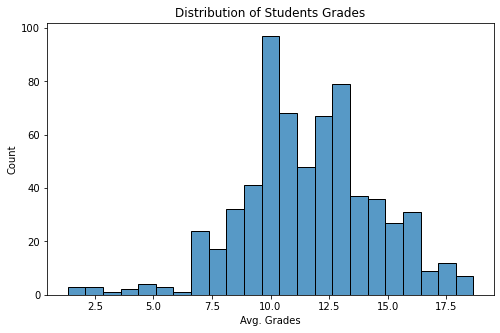

In [8]:
plt.figure(figsize=[8, 5])
sb.histplot(data = students, x = 'Avg. Grades', color = base_color);
plt.title('Distribution of Students Grades')
plt.show()

## First Things First: You Can Not Avoid The Work

It goes without saying that those who study more will -at least on average- get more results. Well, the data supports this. Stating the obvious just to let you know -and the data will keep on telling us- that the more you study -up to a certain point- the better you do.


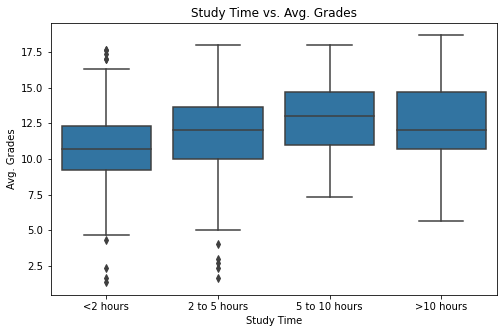

In [9]:
plt.figure(figsize=[8, 5])
sb.boxplot(data = students, x = 'Study Time', y = 'Avg. Grades',  color = base_color);
plt.title('Study Time vs. Avg. Grades')
plt.show()

## Spend Time On Other Things - Wisely

The data shows that student who have other Extracuricular activities, or just go out more perform better than those who don't go out at all or do any activities.

The data also shows that too much of those can harm your grades. So students who do activities and study lightly do better than those who don't do activities and study lightly. But when they both study hard the ones who do not have activities do better. So is the case with going out, there is a critical point after which the more you go out the worse you do on your studies.

Thats why: ___Wisely!___ 

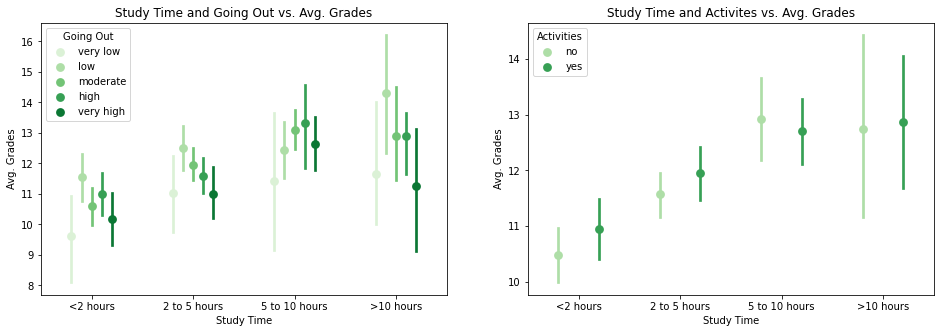

In [10]:
fig, ax = plt.subplots(ncols = 2, figsize = [16,5])

sb.pointplot(data = students, x = 'Study Time', y = 'Avg. Grades', hue = 'Going Out',
                   palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[0])
ax[0].set_title('Study Time and Going Out vs. Avg. Grades')

sb.pointplot(data = students, x = 'Study Time', y = 'Avg. Grades', hue = 'Activities',
                   palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[1])
ax[1].set_title('Study Time and Activites vs. Avg. Grades')
plt.show()

## Do Not Consume Alcholics During The Week

The data suggest that the more alchohol you consume in general the worse you perform. But this is true especially during week days.

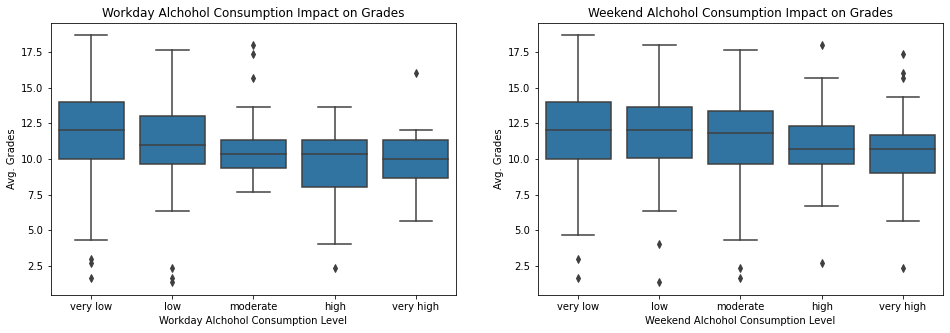

In [11]:
fig, ax = plt.subplots(ncols = 2, figsize = [16,5])

sb.boxplot(data = students, x = 'Weekdays Alc.' , y = 'Avg. Grades' , color = base_color, ax = ax[0])
ax[0].set_title('Workday Alchohol Consumption Impact on Grades')
ax[0].set_xlabel('Workday Alchohol Consumption Level')


sb.boxplot(data = students, x = 'Weekends Alc.' , y = 'Avg. Grades', color = base_color, ax = ax[1])
ax[1].set_title('Weekend Alchohol Consumption Impact on Grades')
ax[1].set_xlabel('Weekend Alchohol Consumption Level')
plt.show()

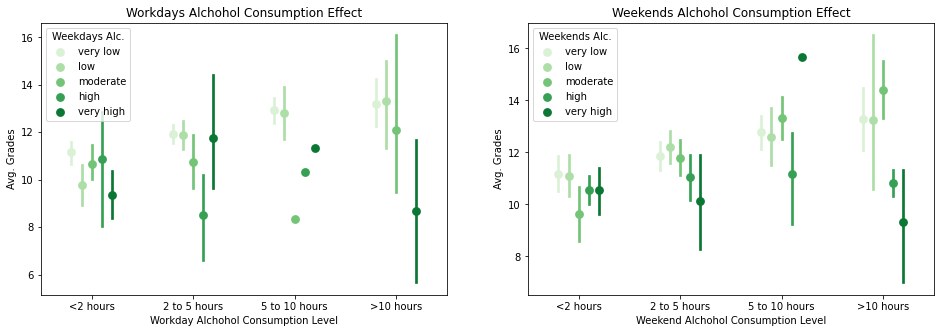

In [12]:
fig, ax = plt.subplots(ncols = 2, figsize = [16,5])

sb.pointplot(data = students, x = 'Study Time', y = 'Avg. Grades', hue = 'Weekdays Alc.',
                   palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[0])
ax[0].set_title('Workdays Alchohol Consumption Effect')
ax[0].set_xlabel('Workday Alchohol Consumption Level')

sb.pointplot(data = students, x = 'Study Time', y = 'Avg. Grades', hue = 'Weekends Alc.',
                   palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[1])
ax[1].set_title('Weekends Alchohol Consumption Effect')
ax[1].set_xlabel('Weekend Alchohol Consumption Level')
plt.show()

## If You Can, Enroll Somewhere Near You

Travel time affects students grades negatively. The higher the travel time the less a student's performance is expected to be.

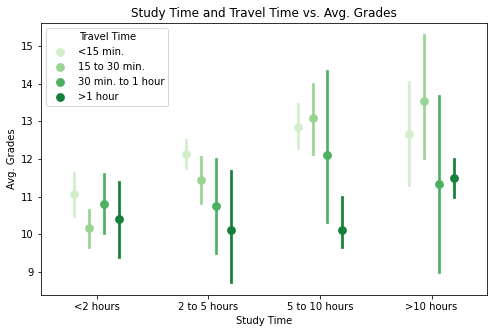

In [13]:
plt.figure(figsize=[8, 5])
sb.pointplot(data = students, x = 'Study Time', y = 'Avg. Grades', hue = 'Travel Time',
                   palette = 'Greens', linestyles = '', dodge = 0.4)
plt.title('Study Time and Travel Time vs. Avg. Grades')
plt.show()

## Aim High

The data shows that students who have higher goals do better than those who don't have goals they want to achieve, even when they study for the same number of hours.

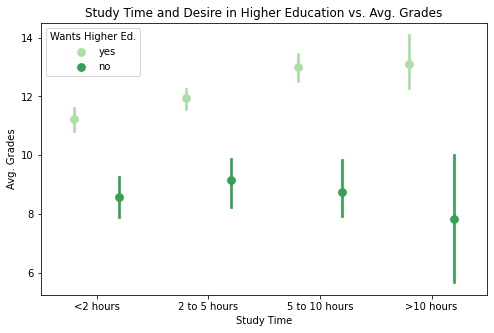

In [14]:
plt.figure(figsize=[8, 5])
sb.pointplot(data = students, x = 'Study Time', y = 'Avg. Grades', hue = 'Wants Higher Ed.',
                   palette = 'Greens', linestyles = '', dodge = 0.4)
plt.title('Study Time and Desire in Higher Education vs. Avg. Grades')
plt.show()